# Libraries

In [1]:
import os  
import cv2           
from time import time
 
import pandas as pd
import numpy as np 

from random import shuffle  

from sklearn.utils import shuffle
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,silhouette_score, homogeneity_score,adjusted_mutual_info_score,completeness_score,v_measure_score,adjusted_rand_score
from sklearn.preprocessing import StandardScaler


from matplotlib import pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages as pdf
%matplotlib inline

In [2]:
data_dir='/Users/gowthamkommineni/Desktop/ML/project/101_ObjectCategories'
IMG_Size =50

# Loading Images and Image Preprocessing

In [3]:
def get_hog(image) : 
    winSize = (32,32)
    blockSize = (8,8)
    blockStride = (4,4)
    cellSize = (8,8)
    nbins = 9
    derivAperture = 1
    winSigma = -1.
    histogramNormType = 1
    L2HysThreshold = 2e-1
    gammaCorrection = 0
    nlevels = 32
    signedGradient = True

    hog = cv2.HOGDescriptor(winSize,blockSize,blockStride,
                            cellSize,nbins,derivAperture,winSigma,histogramNormType,
                            L2HysThreshold,gammaCorrection,nlevels, signedGradient)
    winStride = (8,8)
    padding = (8,8)
    locations = ((10,20),)
    hist = hog.compute(image,winStride,padding,locations)
    hog = np.squeeze(hist)
    return hog

In [39]:
def create_categories():    
    train=[]
    b=[]
    i=0
    for categ in os.listdir(data_dir)[:10]:
        path = os.path.join(data_dir,categ)
        i=i+1
        for img in (os.listdir(path)):
            path2 = os.path.join(path,img)
            if (os.path.exists(path2)):
                gray = cv2.imread(path2,cv2.IMREAD_GRAYSCALE)
                img = cv2.equalizeHist(gray)
                imgb = cv2.GaussianBlur(img,(5,5),0)
                imge= cv2.Canny(imgb,100,200)
                kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 7))
                img = cv2.morphologyEx(imge, cv2.MORPH_CLOSE, kernel)
                img,cnts, _ = cv2.findContours(imge.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
                idx=0
                for c in cnts:
                    x,y,w,h = cv2.boundingRect(c)
                    if w>50 and h>50:
                        idx+=1
                        img=gray[y:y+h,x:x+w]

                orb = cv2.ORB_create()
                # find the keypoints with ORB
                kp = orb.detect(imgb,None)
                # compute the descriptors with ORB
                kp, des = orb.compute(imgb, kp)
                # draw only keypoints location,not size and orientation
                img2 = cv2.drawKeypoints(imgb.copy(),kp,color=(0,255,0),flags=0,outImage=None)
                img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
                img = cv2.resize(imgb, (IMG_Size,IMG_Size))
                img = img.reshape(IMG_Size*IMG_Size)
#                hist=get_hog(img)            # uncomment for HOG
                k=list(img) 
                stdsc = StandardScaler()
                k = stdsc.fit_transform(k)
                k=list(k)
#                 k.extend(hist)              #Uncomment for HOG
#                k=list(img)
                train.append(k)
                b.append(i)
    np.save('train_data.npy', train)
    train=pd.DataFrame(train)
    train['category']=b
    return train

In [40]:
data=shuffle(create_categories())
train=data
print(data.shape)

/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data ei

(1715, 2501)


# DataExploration                                    

In [42]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(train.iloc[:,:len(train.iloc[:,:-1].columns)])
data = pd.DataFrame(x_scaled)
data['category']=train['category']

In [43]:
train.describe()

0            1            2            3            4  \
count  1715.000000  1715.000000  1715.000000  1715.000000  1715.000000   
mean      0.590008     0.481346     0.355663     0.223750     0.125257   
std       1.262753     1.245737     1.217291     1.196920     1.150138   
min      -5.058141    -5.082752    -3.286163    -5.082752    -5.131974   
25%      -0.551382    -0.664069    -0.857303    -0.988344    -0.986709   
50%       1.111345     0.918333     0.675547     0.466724     0.274761   
75%       1.695459     1.640520     1.552353     1.367480     1.187661   
max       3.365219     2.657360     2.675510     2.838862     2.838862   

                 5            6            7            8            9  \
count  1715.000000  1715.000000  1715.000000  1715.000000  1715.000000   
mean      0.022133     0.016261     0.065207     0.089330     0.111029   
std       1.089205     1.066501     1.045643     1.028303     1.014887   
min      -5.082752    -5.181195    -5.107363    -4.984309    -5.255028   
25%      -1.019435    -0.988394    -0.879698    -0.828890    -0.759968   
50%       0.088414     0.092525     0.181908     0.211570     0.231226   
75%       0.981141     0.936725     0.953883     0.936041     0.952430   
max       3.111116     2.893313     2.857012     2.657360     3.020364   

          ...              2491         2492         2493         2494  \
count     ...       1715.000000  1715.000000  1715.000000  1715.000000   
mean      ...         -0.069241    -0.108766    -0.121793    -0.125641   
std       ...          1.019566     1.025649     1.033644     1.047817   
min       ...         -2.183619    -2.205695    -2.360226    -2.382302   
25%       ...         -0.979200    -1.023299    -1.059908    -1.101577   
50%       ...         -0.050111    -0.146208    -0.197701    -0.199375   
75%       ...          0.804782     0.767533     0.773774     0.801802   
max       ...          2.067986     2.067986     2.639210     2.167304   

              2495         2496         2497         2498         2499  \
count  1715.000000  1715.000000  1715.000000  1715.000000  1715.000000   
mean     -0.073774    -0.013659     0.079525     0.216246     0.353890   
std       1.087154     1.132540     1.185046     1.237042     1.263207   
min      -2.514757    -2.647212    -2.757592    -2.757592    -2.757592   
25%      -1.116480    -1.111430    -1.104549    -1.000238    -0.870490   
50%      -0.084698    -0.009749     0.103404     0.335184     0.639024   
75%       0.907002     1.023611     1.211470     1.498011     1.610449   
max       2.711811     2.085942     2.085942     2.096267     2.657360   

          category  
count  1715.000000  
mean      4.019825  
std       2.538769  
min       1.000000  
25%       2.000000  
50%       3.000000  
75%       5.000000  
max      10.000000  

[8 rows x 2501 columns]

In [10]:
ax = train.groupby('category').size().plot(kind='bar', figsize=(10,2))

# Clustering and PCA Analysis

In [44]:
n_samples, n_features = data.shape
n_digits = len(np.unique(data.category))
labels = data.category
sample_size = len(data)

In [45]:
np.random.seed(42)

print(79 * '_')
print('% 9s' %    'init'
      '        time   inertia   homo    compl   v-meas   ARI    AMI    silhouette')

def bench_k_means(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    print('% 9s   %.2fs    %i   %.3f   %.3f   %.3f   %.3f   %.3f    %.3f'
          % (name, (time() - t0), estimator.inertia_,
             homogeneity_score(labels, estimator.labels_),
             completeness_score(labels, estimator.labels_),
             v_measure_score(labels, estimator.labels_),
             adjusted_rand_score(labels, estimator.labels_),
             adjusted_mutual_info_score(labels,  estimator.labels_),
             silhouette_score(data, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=sample_size)))
bench_k_means(KMeans(init='k-means++', n_clusters=n_digits, n_init=10),
              name="k-means++", data=data)

bench_k_means(KMeans(init='random', n_clusters=n_digits, n_init=10),
              name="random", data=data)

#kmeans algorithm only once with n_init=1
pca = PCA(n_components=n_digits).fit(data)
bench_k_means(KMeans(init=pca.components_, n_clusters=n_digits, n_init=1),
              name="PCA-based",
              data=data)
print(79 * '_')

_______________________________________________________________________________
init        time   inertia   homo    compl   v-meas   ARI    AMI    silhouette
k-means++   8.02s    137442   0.169   0.116   0.138   0.044   0.107    0.038
   random   7.34s    137640   0.171   0.118   0.139   0.043   0.108    0.043
PCA-based   0.69s    138097   0.174   0.122   0.143   0.044   0.112    0.048
_______________________________________________________________________________


In [46]:
reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=80)
kmeans.fit(reduced_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=80, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [47]:
# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     
# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1

In [48]:
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

In [49]:
type(reduced_data)
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

In [50]:
type(Z)
Z = Z.reshape(xx.shape)

In [51]:
Z.shape

(189, 187)

# Plotting Cluster for 10 classes 

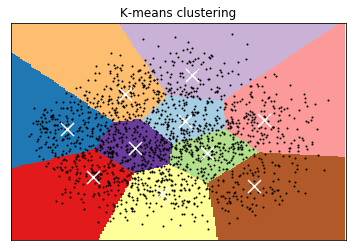

In [52]:
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
pdf.savefig("depth")
plt.show()

# Supervised Learning Models

In [28]:
train_input=train.iloc[:int(len(train)*0.7),:len(train.iloc[:,:-1].columns)].as_matrix()
train_output=train['category'][:int(len(train)*0.7)].as_matrix()
test_input=train.iloc[int(len(train)*0.7):,:len(train.iloc[:,:-1].columns)].as_matrix()
test_output=train['category'][int(len(train)*0.7):].as_matrix()

In [29]:
print(train_input.shape)
print(train_output.shape)
print(test_input.shape)
print(test_output.shape)

(1200, 2500)
(1200,)
(515, 2500)
(515,)


In [54]:
acc=[]
accdt=[]
accrt=[]
accsvm=[]
accnnet=[]
conf=[]
# clf5 = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(12,1), random_state=1)
# MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto',
#        beta_1=0.9, beta_2=0.999, early_stopping=False,
#        epsilon=1e-08, hidden_layer_sizes=(12,1), learning_rate='constant',
#        learning_rate_init=0.01, max_iter=200, momentum=0.9,
#        nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
#        solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
#        warm_start=False)
for n in range(1,40):
    clf1= KNeighborsClassifier(n_neighbors=3,weights='distance')
#     train_input=train.iloc[:int(len(train)*0.7),:len(train.iloc[:,:-1].columns)].as_matrix()
#     train_output=train['category'][:int(len(train)*0.7)].as_matrix()
#     test_input=train.iloc[int(len(train)*0.7):,:len(train.iloc[:,:-1].columns)].as_matrix()
#     test_output=train['category'][int(len(train)*0.7):].as_matrix()
#     #train=shuffle(create_categories(n))
    clf1.fit(train_input, train_output)
    predicted_output=clf1.predict(test_input)
    acc.append(accuracy_score(test_output, predicted_output)*100)
    conf.append(confusion_matrix(test_output, predicted_output))
#     #Decision Tree
#     clf2 = tree.DecisionTreeRegressor()
#     clf2 = clf2.fit(train_input, train_output)
#     predicted_output=clf2.predict(test_input)
#     accdt.append(accuracy_score(test_output, predicted_output)*100)
#     #Random Forest acc=[]
#     clf3 = RandomForestClassifier(n_jobs=4)
#     clf3.fit(train_input, train_output)
#     predicted_output=clf3.predict(test_input)
#     accrt.append(accuracy_score(test_output, predicted_output)*100)
#     #SVM
#     clf4 = svm.SVC(decision_function_shape='ovo')
#     clf4.fit(train_input, train_output)
#     predicted_output=clf4.predict(test_input)
#     accsvm.append(accuracy_score(test_output, predicted_output)*100)
#     #nnet
#     clf5.fit(train_input, train_output)                         
#     pred=clf5.predict(test_input)
#     accnnet.append(accuracy_score(test_output, pred)*100)

In [371]:
plt.plot(accsvm,color='red')
plt.plot(accnnet,color='green')
plt.plot(accdt,color='red')
plt.plot(accrt,color='blue')
plt.title("different neighbors")
plt.show('estimators')  
plt.close()

# Confusion Matrix 

In [337]:
conf_mat_ind=10

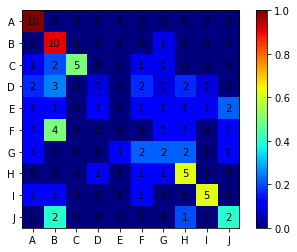

In [355]:
norm_conf = []
for i in conf[conf_mat_ind]:
    a = 0
    tmp_arr = []
    a = sum(i, 0)
    for j in i:
        tmp_arr.append(float(j)/float(a))
    norm_conf.append(tmp_arr)

fig = plt.figure()
plt.clf()
ax = fig.add_subplot(111)
ax.set_aspect(1)
res = ax.imshow(np.array(norm_conf), cmap=plt.cm.jet, 
                interpolation='nearest')

width, height = conf[conf_mat_ind].shape

for x in range(width):
    for y in range(height):
        ax.annotate(str(conf[conf_mat_ind][x][y]), xy=(y, x), 
                    horizontalalignment='center',
                    verticalalignment='center')

cb = fig.colorbar(res)
alphabet = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
plt.xticks(range(width), alphabet[:width])
plt.yticks(range(height), alphabet[:height])
plt.savefig('confusion_matrix.png', format='png')

# Decision Tree

In [340]:
from sklearn import tree
clf = tree.DecisionTreeRegressor()
clf = clf.fit(train_input, train_output)
predicted_output=clf.predict(test_input)
accuracy_score(test_output, predicted_output)*100

55.533980582524265

# Random Forests

In [341]:
from sklearn.ensemble import RandomForestClassifier
acc=[]
for i in range(1,30):
    clf = RandomForestClassifier(n_jobs=i)
    clf.fit(train_input, train_output)
    predicted_output=clf.predict(test_input)
    acc.append(accuracy_score(test_output, predicted_output)*100)

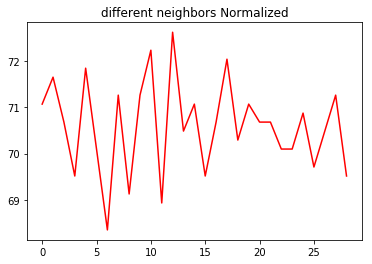

In [342]:
plt.plot(acc,color='red')
plt.title("different neighbors Normalized")
plt.show('estimators')  
plt.close()

# SVM

In [344]:
from sklearn import svm
clf = svm.SVC(decision_function_shape='ovo')
clf.fit(train_input, train_output)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [347]:
predicted_output=clf.predict(test_input)
acchist_svm=accuracy_score(test_output, predicted_output)*100
conf.append(confusion_matrix(test_output, predicted_output))
   

In [346]:
acchist_svm

76.310679611650485

# Neaural Network

In [293]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(12,1), random_state=1)
clf.fit(train_input, train_output)                         
MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False,
       epsilon=1e-08, hidden_layer_sizes=(12,1), learning_rate='constant',
       learning_rate_init=0.01, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(12, 1), learning_rate='constant',
       learning_rate_init=0.01, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [294]:
pred=clf.predict(test_input)
accuracy_score(test_output, pred)*100

42.33009708737864

# Feature Selection Using Random Forest 

In [33]:
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(train_input)
X_test_std = stdsc.transform(test_input)

/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [34]:
X_train_std

array([[-0.77663305, -0.88484567, -0.88420156, ..., -0.32056733,
        -0.43794186, -0.4826965 ],
       [-1.03161226, -0.33981009,  0.68322934, ..., -1.13580242,
        -1.40502547, -1.53609901],
       [ 0.84885945,  0.9319396 , -0.13314092, ..., -1.14681911,
        -1.23498879, -1.306645  ],
       ..., 
       [ 0.84885945,  0.9319396 ,  0.92269795, ..., -1.30105277,
        -1.39439817,  0.99832486],
       [-1.67968444, -1.52606401, -1.55906764, ...,  0.18620043,
        -0.27853248, -0.14894521],
       [-0.84037785, -0.69248018, -0.49234383, ...,  0.77008502,
         0.67792384,  0.56027629]])

In [35]:
from sklearn.ensemble import RandomForestClassifier

feat_labels = train[1:]

forest = RandomForestClassifier(n_estimators=10,
                                random_state=0,
                                n_jobs=-1)

forest.fit(train_input, train_output)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(train_input.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plt.title('Feature Importances')
plt.bar(range(train_input.shape[1]), 
        importances[indices],
        color='lightblue', 
        align='center')

plt.xticks(range(train_input.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, train_input.shape[1]])
plt.tight_layout()
plt.savefig('./random_forest.png', dpi=300)
plt.show()

 1) 504     218
815     255
296     240
348      68
261     255
811     255
192     255
11        0
658     218
1591    255
285     133
788     255
661     255
860       0
1499    200
831      78
48      241
854     255
1240    101
577     208
1517    193
1565     24
1519    255
1395    253
165     255
1024    222
1420     50
1114     32
1295    141
679     255
       ... 
1052    101
1016    255
1696    255
1337     99
282     255
1702    108
464     255
963     133
1596    115
1287    207
1599    255
1265     39
1534    144
118     255
276     125
472      92
768     240
632      62
1257    255
480      15
570     255
312     255
1491     61
1670    178
413     255
1273    255
600     255
869     255
1453     10
1449    226
Name: 1801, dtype: int64 0.023255
 2) 504      61
815     255
296     255
348      57
261     255
811     255
192     255
11        0
658     246
1591    255
285     175
788     255
661     255
860       0
1499     35
831     150
48        0
854     255
1240     8

67) 504      54
815     255
296     255
348      26
261     255
811     255
192     255
11        1
658     251
1591    255
285     194
788     255
661     255
860      10
1499    223
831      31
48        0
854     255
1240    185
577     255
1517    181
1565      0
1519    255
1395    255
165     255
1024    222
1420    125
1114    116
1295    255
679     255
       ... 
1052     19
1016    255
1696    255
1337     49
282     255
1702    108
464     255
963     126
1596    235
1287    143
1599    255
1265    199
1534     79
118     255
276     148
472      34
768     255
632      31
1257    105
480     255
570     255
312     255
1491    143
1670    198
413     255
1273    255
600     255
869     255
1453    252
1449    173
Name: 300, dtype: int64 0.002166
68) 504      46
815     228
296      26
348      32
261       4
811      28
192     124
11       30
658       6
1591     73
285     249
788     149
661      15
860     119
1499    165
831      32
48      122
854      27
1240    202

Name: 919, dtype: int64 0.000907
280) 504      57
815     200
296     163
348     181
261      32
811     124
192      14
11      175
658     102
1591     41
285     205
788     181
661     104
860     171
1499     91
831     108
48       98
854     150
1240    222
577     156
1517    115
1565     96
1519     39
1395    119
165     125
1024    139
1420     93
1114     71
1295    123
679     220
       ... 
1052    116
1016    144
1696      5
1337     95
282      49
1702    200
464     120
963     148
1596    167
1287    183
1599     21
1265    224
1534    186
118     144
276      95
472      81
768     137
632     157
1257    116
480      78
570     166
312      16
1491     54
1670     86
413     195
1273    108
600     142
869      22
1453    172
1449    153
Name: 680, dtype: int64 0.000906
281) 504      29
815      92
296     119
348     100
261      10
811      81
192      31
11       36
658     123
1591    255
285     104
788      67
661      62
860      90
1499    165
831      52


453) 504     126
815      96
296      39
348     190
261     190
811      36
192      85
11      220
658     152
1591    255
285     126
788      70
661     196
860      34
1499    134
831      46
48       85
854     194
1240     21
577     179
1517    180
1565     14
1519    255
1395    162
165     212
1024    130
1420     86
1114    217
1295     52
679      64
       ... 
1052    147
1016     29
1696    255
1337     58
282     174
1702    171
464     190
963     188
1596     24
1287    116
1599     29
1265     31
1534    135
118      98
276     230
472      81
768     141
632     227
1257     34
480     188
570      50
312     118
1491     80
1670     74
413      47
1273     89
600      54
869     255
1453     86
1449    233
Name: 2166, dtype: int64 0.000580
454) 504      31
815     113
296     201
348      67
261      42
811      63
192      35
11      239
658     188
1591     41
285      57
788     175
661     219
860      66
1499    113
831      28
48      126
854      67
1240    

Name: 2177, dtype: int64 0.000376
653) 504     124
815     181
296     190
348     125
261      83
811     154
192     111
11      125
658     190
1591    255
285     235
788      90
661     101
860      72
1499    245
831     204
48       65
854     136
1240    142
577     151
1517    132
1565    171
1519     53
1395     99
165     101
1024    215
1420    100
1114     73
1295      6
679     145
       ... 
1052    125
1016    150
1696     57
1337    112
282      99
1702    219
464      79
963     169
1596    182
1287    111
1599    131
1265    241
1534    128
118     179
276      75
472     230
768     166
632     157
1257    164
480      11
570     182
312      49
1491    183
1670    127
413     196
1273     22
600     153
869     255
1453     45
1449    195
Name: 421, dtype: int64 0.000375
654) 504      75
815      70
296      37
348     205
261     217
811      66
192      86
11      159
658      64
1591    194
285     189
788      16
661     147
860     216
1499    251
831     164

Name: 708, dtype: int64 0.000279
756) 504      35
815      94
296     250
348      47
261      51
811     255
192     255
11      126
658      67
1591    244
285      84
788     255
661      58
860     104
1499     99
831     126
48       88
854     255
1240    106
577     190
1517     72
1565    255
1519    255
1395    255
165     192
1024    183
1420    246
1114    160
1295    149
679     241
       ... 
1052      6
1016    255
1696    255
1337    107
282     160
1702    108
464      80
963     169
1596    145
1287    217
1599    223
1265    123
1534     40
118     255
276     155
472      82
768      71
632      30
1257     24
480     113
570     255
312     255
1491     98
1670    237
413      95
1273    161
600     255
869     184
1453    117
1449     46
Name: 1148, dtype: int64 0.000278
757) 504      53
815      56
296     192
348      44
261     187
811     255
192     255
11      155
658     225
1591    255
285     173
788     255
661      38
860     167
1499    232
831     122

Name: 2085, dtype: int64 0.000202
903) 504      77
815     136
296     135
348     119
261      64
811     139
192      63
11      119
658     222
1591    255
285     192
788      93
661     116
860     175
1499    215
831      90
48      140
854     144
1240    176
577     144
1517     71
1565    244
1519     47
1395     62
165     113
1024    214
1420    108
1114    149
1295      5
679     123
       ... 
1052    200
1016     22
1696    255
1337    112
282     128
1702    108
464     120
963     188
1596    211
1287    243
1599    255
1265    215
1534    222
118     139
276     105
472     158
768      38
632     182
1257    142
480     138
570     165
312     102
1491    199
1670    126
413     175
1273     36
600     176
869     255
1453     77
1449    170
Name: 514, dtype: int64 0.000201
904) 504      77
815      62
296     255
348      27
261     109
811     255
192     255
11        0
658     135
1591    255
285      69
788     255
661     231
860       0
1499     18
831     190

Name: 1591, dtype: int64 0.000121
1025) 504     245
815     232
296     233
348     198
261      68
811     101
192     192
11       59
658     219
1591     28
285     249
788     203
661     170
860     144
1499     72
831     140
48       60
854      98
1240     69
577     226
1517    197
1565     69
1519     44
1395     69
165      21
1024    216
1420     44
1114    125
1295    103
679     147
       ... 
1052    166
1016     43
1696    232
1337    232
282     170
1702    105
464     103
963     119
1596     54
1287    118
1599     64
1265    136
1534     29
118      26
276     173
472     215
768     147
632     250
1257    174
480     173
570     195
312     191
1491    241
1670    158
413     170
1273    145
600     137
869      59
1453    191
1449    146
Name: 1280, dtype: int64 0.000121
1026) 504      42
815     176
296     160
348     239
261      82
811     115
192      45
11      255
658      91
1591      5
285     168
788     112
661     116
860      53
1499     31
831     

1127) 504     132
815      95
296      57
348     148
261      11
811     105
192     128
11      255
658     163
1591     84
285      64
788     176
661     117
860      98
1499    166
831     211
48       90
854     145
1240    128
577      71
1517    211
1565     95
1519    166
1395    104
165     205
1024     78
1420    147
1114    193
1295    255
679      68
       ... 
1052    102
1016    255
1696    255
1337    232
282     192
1702    108
464     205
963     197
1596    108
1287    113
1599    122
1265     96
1534    234
118      61
276      62
472     113
768     190
632     222
1257     47
480     225
570      85
312      36
1491     82
1670     55
413      72
1273    116
600      77
869      18
1453    178
1449     46
Name: 1608, dtype: int64 0.000118
1128) 504     208
815      65
296      73
348      13
261     184
811      83
192     158
11       43
658     109
1591     81
285     252
788     210
661      12
860      65
1499    164
831     121
48      125
854     196
1240  

1225) 504     134
815      85
296      50
348     181
261     177
811      80
192     109
11      115
658     104
1591     49
285     131
788      55
661      92
860      80
1499      6
831      35
48        0
854      66
1240     36
577     205
1517     84
1565      1
1519     59
1395    185
165      47
1024    184
1420     81
1114    165
1295     42
679      55
       ... 
1052    254
1016    255
1696    201
1337    110
282     184
1702    136
464     201
963     201
1596     74
1287     90
1599     30
1265     46
1534    162
118      63
276     218
472      90
768      36
632     107
1257     46
480      64
570      58
312     155
1491     44
1670    116
413      16
1273    254
600      71
869     255
1453     23
1449    243
Name: 2240, dtype: int64 0.000000
1226) 504      31
815      46
296     100
348     127
261     225
811     255
192     255
11        0
658      47
1591    255
285     201
788      71
661      52
860       0
1499      0
831     111
48        0
854     255
1240  

1317) 504     155
815     109
296      60
348     189
261     178
811      40
192      64
11      189
658     143
1591    208
285      86
788      37
661     224
860      63
1499    138
831     120
48       88
854     178
1240    212
577     108
1517    154
1565    220
1519    255
1395    165
165     209
1024     54
1420     58
1114    220
1295     47
679      36
       ... 
1052     44
1016     32
1696      8
1337     85
282     142
1702    184
464     205
963      51
1596     44
1287     37
1599     36
1265    127
1534    138
118     109
276      37
472     153
768      32
632     227
1257     40
480     192
570      59
312     135
1491    158
1670     70
413      31
1273    111
600      46
869     255
1453     59
1449     95
Name: 2123, dtype: int64 0.000000
1318) 504     135
815     106
296      54
348     200
261     177
811      29
192      69
11      191
658     171
1591    255
285     126
788      41
661     217
860     169
1499    132
831     137
48       61
854     185
1240  

Name: 607, dtype: int64 0.000000
1404) 504      62
815     102
296      99
348     112
261      31
811      34
192     168
11       90
658     149
1591    255
285     124
788     165
661     205
860     146
1499     91
831     134
48      223
854     106
1240    168
577     159
1517    129
1565    255
1519    150
1395    169
165     119
1024    146
1420    174
1114    153
1295     33
679     187
       ... 
1052     90
1016    128
1696    255
1337    101
282     189
1702    108
464     196
963     132
1596    143
1287    166
1599    255
1265    204
1534    161
118     127
276     153
472      13
768      26
632     156
1257     41
480     232
570     114
312     104
1491    163
1670    107
413     228
1273     75
600     177
869     255
1453    148
1449    137
Name: 608, dtype: int64 0.000000
1405) 504     220
815      68
296      71
348     113
261      37
811      15
192      43
11      131
658      34
1591    255
285     153
788     177
661     101
860      70
1499     59
831       

Name: 2312, dtype: int64 0.000000
1495) 504     140
815     143
296     161
348     144
261     123
811     162
192     145
11      113
658     241
1591    255
285     217
788     118
661     156
860     141
1499    195
831     209
48       58
854     108
1240    181
577     145
1517    143
1565    255
1519     42
1395    105
165      81
1024    145
1420     52
1114     72
1295    255
679     133
       ... 
1052    150
1016     35
1696    255
1337    207
282     218
1702    108
464      85
963     144
1596    168
1287    202
1599    247
1265    220
1534    112
118     194
276     108
472     252
768      44
632     178
1257     61
480     153
570     177
312      67
1491    198
1670    116
413     184
1273     54
600     150
869     255
1453     56
1449    222
Name: 315, dtype: int64 0.000000
1496) 504     120
815     149
296     158
348     128
261     103
811     162
192     143
11      108
658     237
1591    255
285     212
788     114
661     148
860      70
1499    233
831     2

Name: 2361, dtype: int64 0.000000
1595) 504      36
815      55
296      29
348     202
261     227
811      55
192      75
11        0
658     175
1591    255
285     160
788      52
661     128
860       5
1499    143
831     148
48      215
854     164
1240     55
577      17
1517    203
1565    211
1519    255
1395    106
165     156
1024    222
1420     55
1114    145
1295    255
679     122
       ... 
1052    160
1016    175
1696    255
1337    103
282     195
1702    146
464     100
963     123
1596     46
1287     48
1599     51
1265     23
1534    247
118      69
276     229
472     141
768     109
632     154
1257     74
480     215
570      34
312     114
1491     47
1670    171
413      71
1273    255
600      52
869      34
1453     37
1449    243
Name: 2360, dtype: int64 0.000000
1596) 504      49
815      49
296      46
348     175
261     226
811      58
192      83
11        0
658     175
1591    255
285     153
788      67
661     117
860       0
1499    149
831     

1706) 504      93
815     104
296     220
348      59
261      92
811     128
192     191
11        0
658     152
1591    255
285      36
788      39
661     210
860       0
1499    109
831     211
48      198
854      40
1240     50
577     103
1517     32
1565    175
1519    255
1395     44
165      85
1024    222
1420    230
1114    166
1295    255
679      95
       ... 
1052     19
1016    236
1696     68
1337    178
282      26
1702    108
464      15
963      18
1596    240
1287    145
1599    132
1265    178
1534    185
118     202
276      39
472     180
768     205
632      41
1257    255
480     143
570     121
312     123
1491    182
1670    248
413     157
1273    255
600     119
869     255
1453     79
1449    136
Name: 394, dtype: int64 0.000000
1707) 504     112
815     155
296     204
348      95
261      59
811     148
192     140
11        1
658     203
1591     92
285     184
788     109
661     162
860     112
1499     76
831     238
48      114
854      87
1240   

1814) 504     210
815      25
296      85
348     128
261     204
811     255
192     255
11      203
658     200
1591    198
285      86
788     184
661      40
860       5
1499     25
831      72
48      104
854      55
1240    129
577      54
1517    185
1565    253
1519    151
1395     45
165     235
1024    170
1420     52
1114     34
1295    141
679     182
       ... 
1052    108
1016    255
1696    255
1337    232
282     235
1702    108
464     192
963      84
1596     77
1287    188
1599    167
1265     33
1534     95
118     255
276      62
472     195
768     181
632      99
1257    254
480      15
570      78
312     255
1491     23
1670     44
413      78
1273    158
600      12
869     172
1453      5
1449    186
Name: 1754, dtype: int64 0.000000
1815) 504      85
815     255
296     255
348      44
261     255
811     255
192     255
11      255
658     238
1591    255
285      26
788     255
661     255
860       4
1499    202
831      96
48       64
854     255
1240  

Name: 1260, dtype: int64 0.000000
1918) 504     225
815      30
296      72
348     165
261     191
811      52
192      38
11      229
658     169
1591    255
285     102
788     168
661      69
860     157
1499    171
831      86
48      189
854     106
1240    162
577      49
1517    238
1565     60
1519    131
1395     35
165     227
1024     56
1420     54
1114    140
1295    141
679      43
       ... 
1052    135
1016    166
1696    255
1337    233
282     166
1702    108
464     199
963      51
1596    140
1287     66
1599    109
1265     42
1534     88
118      78
276     179
472     128
768     197
632     177
1257    255
480      22
570      62
312      74
1491     64
1670     10
413      29
1273    123
600      66
869      25
1453     94
1449    205
Name: 1807, dtype: int64 0.000000
1919) 504     245
815     174
296      20
348     169
261     108
811      83
192     192
11      136
658     104
1591     88
285     232
788     205
661     238
860      83
1499    175
831     

2067) 504     170
815     164
296      82
348     142
261      27
811       3
192      36
11       61
658     120
1591    164
285      39
788      78
661     173
860      54
1499    105
831     102
48      103
854     161
1240     14
577      97
1517    142
1565     18
1519     56
1395     34
165      18
1024     24
1420    202
1114    110
1295     70
679      65
       ... 
1052    214
1016    159
1696     23
1337    232
282     137
1702    125
464      43
963     122
1596    236
1287    166
1599    255
1265     80
1534    238
118      32
276      55
472      10
768      52
632      63
1257    255
480     190
570       3
312      90
1491     95
1670     68
413      99
1273     77
600     154
869      33
1453    176
1449     39
Name: 1735, dtype: int64 0.000000
2068) 504     159
815     110
296      63
348     119
261      58
811       3
192      37
11      103
658     151
1591    172
285      27
788      80
661     193
860      56
1499    178
831     108
48       69
854     167
1240  

2327) 504      10
815      37
296     161
348      64
261     123
811     255
192     255
11       67
658      65
1591    165
285      66
788     255
661      70
860     220
1499     82
831      81
48       50
854     255
1240    142
577      87
1517     23
1565    255
1519    255
1395    255
165     217
1024    222
1420    250
1114     36
1295    157
679     109
       ... 
1052      5
1016    255
1696    255
1337    121
282     132
1702    108
464      84
963     123
1596    219
1287    209
1599    102
1265    130
1534     30
118     255
276     158
472      70
768     127
632      33
1257     37
480      68
570     178
312     255
1491     93
1670    225
413     100
1273    138
600     255
869      64
1453     92
1449     44
Name: 1097, dtype: int64 0.000000
2328) 504       8
815      33
296     250
348      46
261      94
811     255
192     255
11      165
658      75
1591    171
285      82
788     255
661      64
860       8
1499     95
831      99
48       91
854     255
1240  

2460) 504     196
815      39
296       4
348      79
261     139
811       9
192      42
11       97
658      82
1591     28
285      70
788      54
661     132
860     230
1499    186
831      84
48       67
854     165
1240     84
577      56
1517    189
1565     24
1519    255
1395     85
165     192
1024     55
1420     28
1114    125
1295     84
679      50
       ... 
1052    226
1016     95
1696     55
1337    154
282     101
1702    223
464      11
963      18
1596     92
1287     65
1599    245
1265     56
1534    240
118       7
276     189
472      14
768     117
632     210
1257    149
480      64
570      71
312      68
1491     43
1670     37
413      23
1273     91
600      26
869      13
1453    130
1449     16
Name: 1932, dtype: int64 0.000000
2461) 504      34
815     126
296     142
348     243
261      37
811     189
192      82
11       84
658      67
1591     82
285      51
788      89
661     108
860     170
1499    119
831     104
48      225
854     211
1240  

In [155]:
from sklearn.feature_selection import SelectFromModel
sfm = SelectFromModel(forest, threshold=0.002, prefit=True)
X_selected = sfm.transform(train_input)
t=sfm.transform(test_input)

In [156]:
test_input=pd.DataFrame(t)
train_input=pd.DataFrame(X_selected)

In [157]:
train_input.head() 

0         1         2    3         4         5    6         7    \
0  0.000000  0.000000  0.000000  0.0  0.000000  0.000000  0.0  0.000000   
1  0.564098  0.564098  0.002445  0.0  0.199291  0.503782  0.0  0.503782   
2  0.000000  0.000000  0.000000  0.0  0.000000  0.000000  0.0  0.000000   
3  0.000000  0.000000  0.000000  0.0  0.000000  0.000000  0.0  0.000000   
4  0.000000  0.000000  0.000000  0.0  0.000000  0.000000  0.0  0.000000   

        8    9      ...          241       242       243       244       245  \
0  0.000000  0.0    ...     0.031731  0.001088  0.003843  0.044395  0.065384   
1  0.183499  0.0    ...     0.696857  0.542770  0.183477  0.272044  0.045329   
2  0.000000  0.0    ...     0.000000  0.000000  0.000000  0.000000  0.000000   
3  0.000000  0.0    ...     0.000000  0.000000  0.000000  0.000000  0.000000   
4  0.000000  0.0    ...     0.516723  0.704091  0.704091  0.038252  0.000000   

        246       247       248       249       250  
0  0.236945  0.682465  0.681927  0.000623  0.000302  
1  0.032140  0.004454  0.001556  0.542770  0.542770  
2  0.000000  0.000000  0.000000  0.000000  0.000000  
3  0.000000  0.000000  0.000000  0.000000  0.000000  
4  0.003753  0.000583  0.000238  0.000052  0.002517  

[5 rows x 251 columns]